The great inspiration of the analysis is the wonderful book Practical Statistics in Data Science by Peter Bruce and Andrew Bruce. The data used to explain main terminology in statistics (1st chapter of the book) is the file 'cabbages.csv' chosen from the files available in R library MASS. The file contains 60 entries and 5 columns: ID, Cult (2 cultivars), Date (3 planting dates), HeadWt (weight of the cabbage head) and VitC (vitamin C content). 

In [1]:
#opening and reading file
import pandas as pd
file = pd.read_csv('cabbages.csv')

In [2]:
file

,ID,Cult,Date,HeadWt,VitC
0,1,c39,d16,2.5,51
1,2,c39,d16,2.2,55
2,3,c39,d16,3.1,45
3,4,c39,d16,4.3,42
4,5,c39,d16,2.5,53
5,6,c39,d16,4.3,50
6,7,c39,d16,3.8,50
7,8,c39,d16,4.3,52
8,9,c39,d16,1.7,56
9,10,c39,d16,3.1,49


In [3]:
#data description
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      60 non-null     int64  
 1   Cult    60 non-null     object 
 2   Date    60 non-null     object 
 3   HeadWt  60 non-null     float64
 4   VitC    60 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5+ KB


In [4]:
file.describe()

,ID,HeadWt,VitC
count,60.000000,60.000000,60.00000
mean,30.500000,2.593333,57.95000
std,17.464249,0.882382,10.11866
min,1.000000,1.000000,41.00000
25%,15.750000,1.875000,50.75000
50%,30.500000,2.550000,56.00000
75%,45.250000,3.125000,66.25000
max,60.000000,4.300000,84.00000


One of the main terms is mean (average). It is sum of all values divided by the number of these values.
To calculate the meam of the weight of the cabbage head, the sum of all values is divided by the number of these values (60 entries). The mean weight is 2.59 kg.

In [5]:
#calculating mean
file['HeadWt'].mean()

2.5933333333333333

Another term is median (50th percentile) which is the middle value in the sorted values. In this case, the median is 2.55.

In [6]:
#calculating median
file['HeadWt'].median()

2.55

There are also terms describing how values are dispersed (if they are clustered or widely dispersed).
The variance is the average of the sum of squared difference between each value and the mean of all values), while the standard deviation is the square root of the variance. The variance is $$0.882382496458592 ^ 2 = 0.7656222222222222.$$ In this case, the values are located mostly between $$1,710950837 = 2,59333333333333 - 0,882382496458592$$ and $$3,47571583
=2,59333333333333 + 0,882382496458592.$$ 

In [7]:
from scipy.stats import moment

In [8]:
#calculating variance
moment(file['HeadWt'], moment=2)

0.7656222222222222

In [9]:
#calculating standard deviation
file['HeadWt'].std()

0.882382496458592

The dispersion of all values cas be visualised by means of the boxplot showing the five-number summary: the median (2.55), the lower quartile (1.87), the upper quartile (3.12), the maximum (4.3) and the minimum (1). There are no outlayers values. 

In [10]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x2d649fbfdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x2d64bfdc490>,
 'boxes': [<matplotlib.lines.Line2D at 0x2d649fbf9a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2d64bfdcbb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2d64bfdcf40>],
 'means': []}

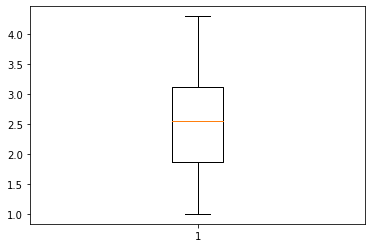

In [11]:
plt.boxplot(file[['HeadWt']])

Another important term is the skewness which is a measure of the asymmetry of values disperson. If the skewness value is positive (0.2463460740740742), as it is the case, it means the distribution is said to be right-skewed (most values are located below the mean). 

(array([ 4., 12., 12., 12.,  8.,  6.,  6.]),
 array([1.        , 1.47142857, 1.94285714, 2.41428571, 2.88571429,
        3.35714286, 3.82857143, 4.3       ]),
 <BarContainer object of 7 artists>)

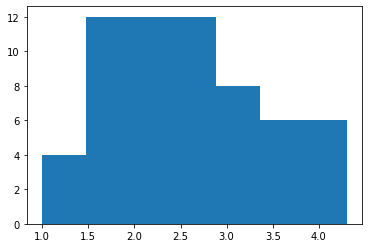

In [12]:
plt.hist(file[['HeadWt']], bins = 7)

In [13]:
#calculating skewness
moment(file['HeadWt'], moment=3)

0.2463460740740742

To see the dependance between the weight of the cabbage head and the vitamin C content, the correlation can be calculated. The weight of the cabbage head values and the vitamin C content values are negatively correlated (high values - cabbage head weight go with low values - vitamin C content). As it is shown below, the content of the vitamin C is lower when the weight is greater. The conclusion is that most vitamin C is contained in small cabbages.

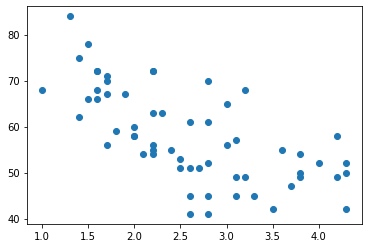

In [14]:
plt.scatter(file['HeadWt'],file['VitC'])

In [15]:
#calculating correlation
file.iloc[:,3:].corr()

,HeadWt,VitC
HeadWt,1.000000,-0.659892
VitC,-0.659892,1.000000
